In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 114s   


In [4]:
from keras.utils import to_categorical
print ("Podaci za treniranje", train_images.shape, train_labels.shape)
print ("Podaci za testiranje", test_images.shape, test_labels.shape)

Podaci za treniranje (60000, 28, 28) (60000,)
Podaci za testiranje (10000, 28, 28) (10000,)


In [5]:
import numpy as np
classes = np.unique(train_labels)
nClasses = len(classes)

print ("Broj izlaznih kategorija", nClasses)
print ("Izlazne kategorije", classes)

Broj izlaznih kategorija 10
Izlazne kategorije [0 1 2 3 4 5 6 7 8 9]


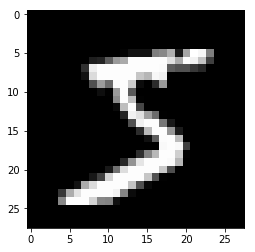

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(train_images[0, :, :], cmap='gray')

In [10]:
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

In [11]:
train_labels_one_hot = to_categorical (train_labels)
test_labels_one_hot = to_categorical (test_labels)

print ("Prva oznaka: ", train_labels[0])
print ("Prva oznaka nakon transformacije: ", train_labels_one_hot[0])

Prva oznaka:  5
Prva oznaka nakon transformacije:  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential ()
model.add(Dense (512, activation='relu', input_shape=(dim_data,)))
model.add(Dense (512, activation='relu'))
model.add(Dense (nClasses, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit (train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s - loss: 0.2773 - acc: 0.9136 - val_loss: 0.1269 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 11s - loss: 0.0928 - acc: 0.9708 - val_loss: 0.1082 - val_acc: 0.9680
Epoch 3/20
60000/60000 [==============================] - 11s - loss: 0.0579 - acc: 0.9817 - val_loss: 0.0825 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 11s - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0727 - val_acc: 0.9796
Epoch 5/20
60000/60000 [==============================] - 11s - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0892 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 11s - loss: 0.0229 - acc: 0.9923 - val_loss: 0.0883 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 12s - loss: 0.0180 - acc: 0.9937 - val_loss: 0.0985 - val_acc: 0.9773
Epoch 8/20
60000/60000 [==============================